<a href="https://colab.research.google.com/github/medjbersoundous/Recovery-ml/blob/main/finalproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading dataset and required libraries

In [107]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ziya07/athlete-injury-and-performance-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/athlete-injury-and-performance-dataset/versions/1


In [108]:
import os
print(os.listdir("/root/.cache/kagglehub/datasets/ziya07/athlete-injury-and-performance-dataset/versions/1"))

['collegiate_athlete_injury_dataset.csv']


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [109]:
fitness_dataset = pd.read_csv('/root/.cache/kagglehub/datasets/ziya07/athlete-injury-and-performance-dataset/versions/1/collegiate_athlete_injury_dataset.csv')

#Analysing the dataset

In [5]:
fitness_dataset.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [7]:
fitness_dataset.columns

Index(['Athlete_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'Position',
       'Training_Intensity', 'Training_Hours_Per_Week',
       'Recovery_Days_Per_Week', 'Match_Count_Per_Week',
       'Rest_Between_Events_Days', 'Fatigue_Score', 'Performance_Score',
       'Team_Contribution_Score', 'Load_Balance_Score', 'ACL_Risk_Score',
       'Injury_Indicator'],
      dtype='object')

In [8]:
fitness_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [11]:
#checking for missing values
fitness_dataset.isnull().values.sum()

np.int64(0)

In [13]:
#checking the shape
fitness_dataset.shape

(200, 17)

In [14]:
#get a resume about the dataset
fitness_dataset.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.170000,180.805000,77.475000,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,46.470000,0.070000
std,2.002787,11.529598,12.440789,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,18.943956,0.255787
min,18.000000,160.000000,55.000000,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,2.000000,0.000000
25%,19.000000,171.000000,67.000000,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,33.000000,0.000000
50%,21.000000,182.500000,77.500000,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000
75%,23.000000,191.000000,89.000000,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,60.000000,0.000000
max,24.000000,199.000000,99.000000,9.00000,19.000000,3.000000,4.000000,3.000000,9.000000,99.000000,99.000000,100.000000,100.000000,1.000000


In [15]:
#checking if there's dublicated values
fitness_dataset.duplicated().sum()

np.int64(0)

# Visualization

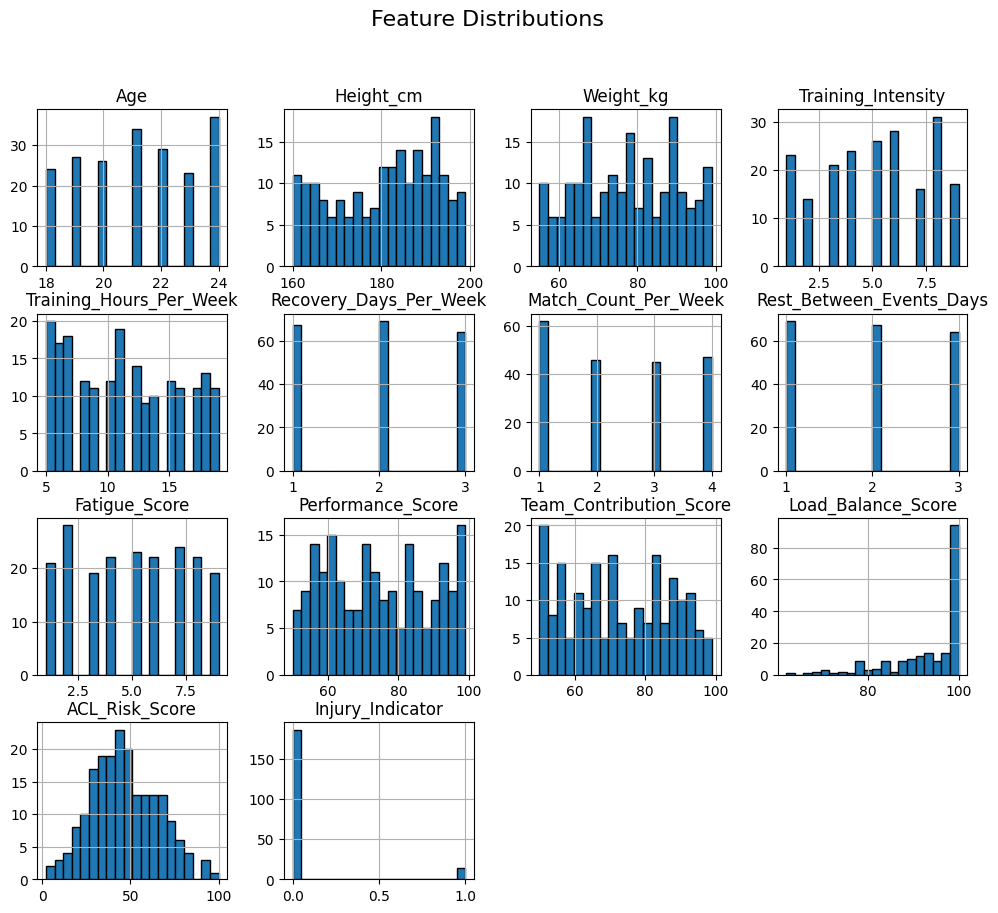

In [18]:
fitness_dataset.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


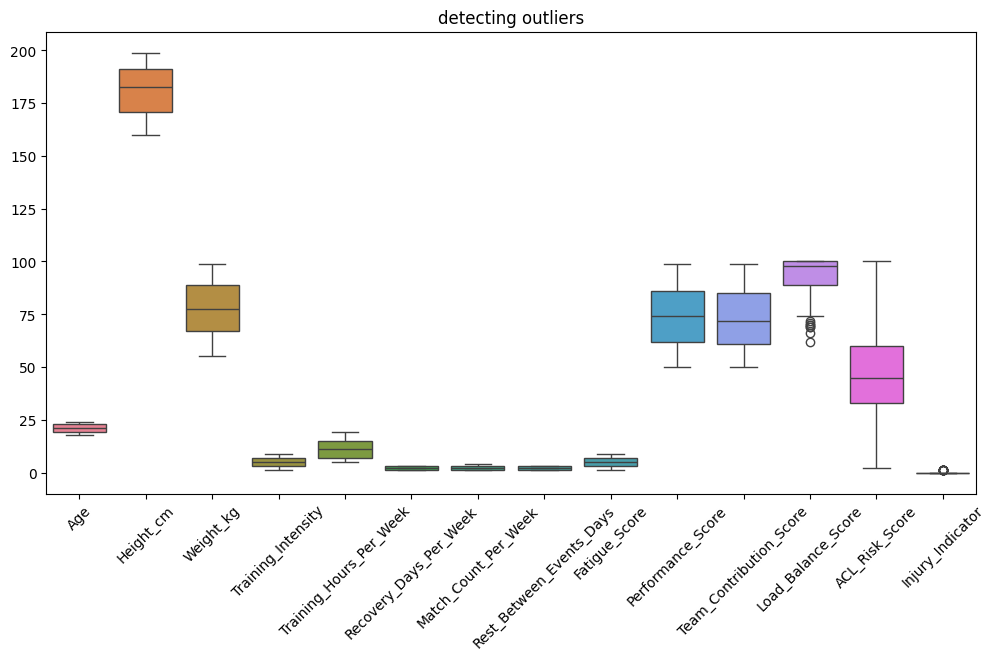

In [21]:
# Boxplot for detecting outliers and dropping the categorical columns
plt.figure(figsize=(12, 6))
data=fitness_dataset.drop(columns=[ "Athlete_ID","Gender", "Position"])
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title("detecting outliers")
plt.show()


<ipython-input-23-7a1b0b6747bb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=fitness_dataset[col], palette="coolwarm")
<ipython-input-23-7a1b0b6747bb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=fitness_dataset[col], palette="viridis")


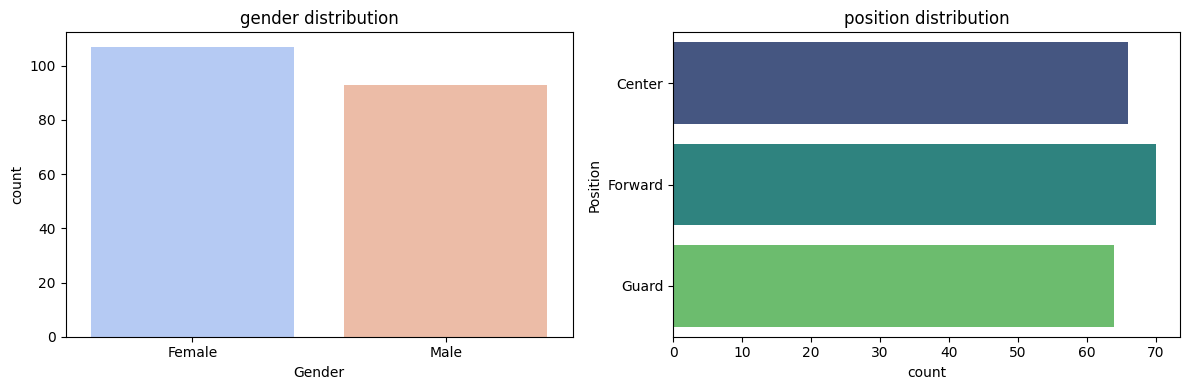

In [23]:
#visualize the distribution of gender and position
categorical_columns = ["Gender", "Position"]
titles = ["gender distribution", "position distribution"]
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 2, i + 1)
    if col == "Gender":
        sns.countplot(x=fitness_dataset[col], palette="coolwarm")
    else:
        sns.countplot(y=fitness_dataset[col], palette="viridis")
    plt.title(titles[i])
plt.tight_layout()
plt.show()

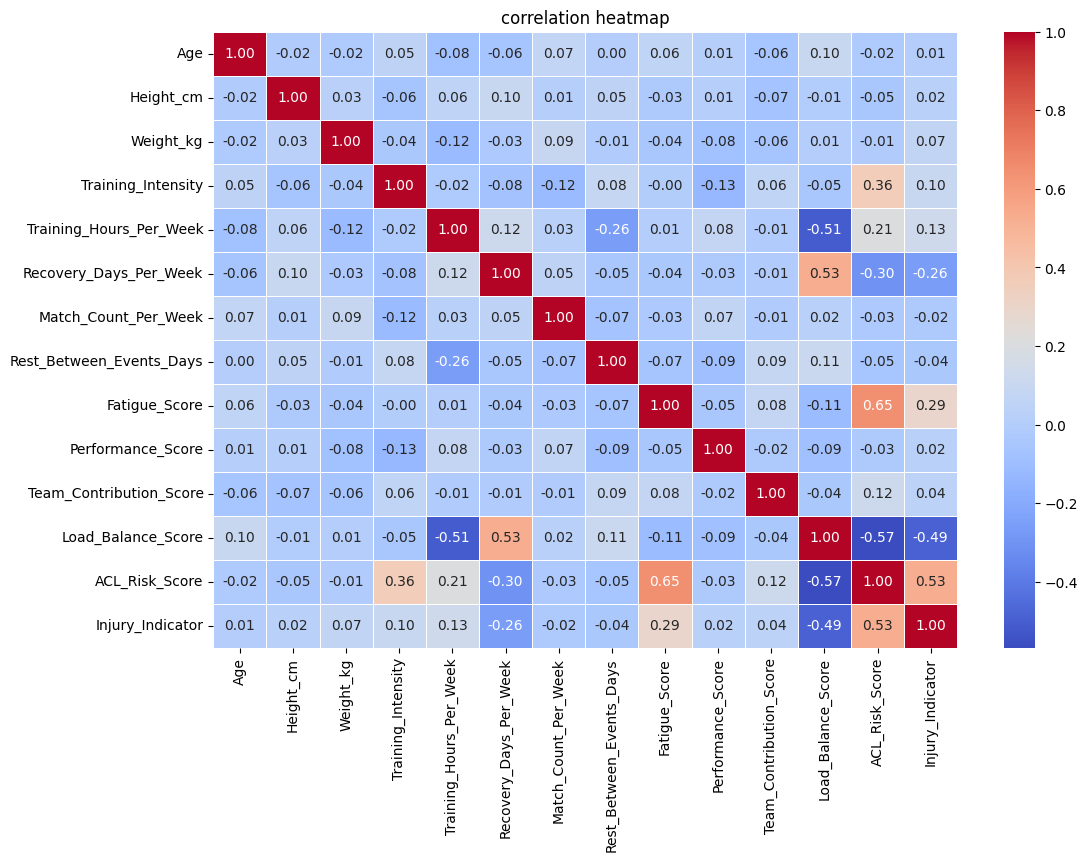

In [99]:
numerical_columns = fitness_dataset.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = fitness_dataset[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

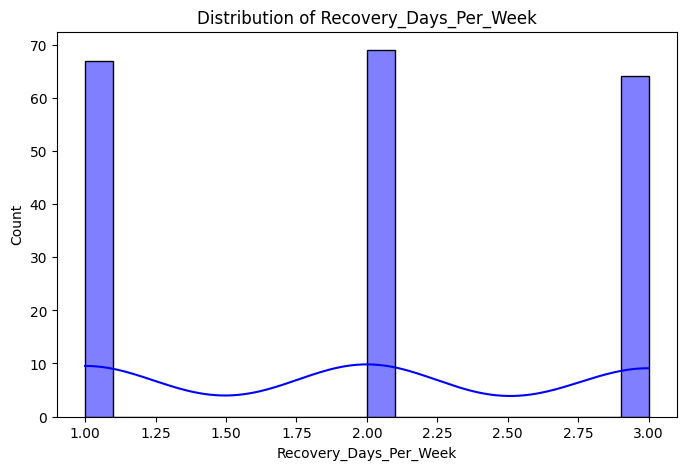

In [27]:
# Check the target variable name
plt.figure(figsize=(8, 5))
sns.histplot(fitness_dataset["Recovery_Days_Per_Week"], bins=20, kde=True, color="blue")

plt.title(f"Distribution of Recovery_Days_Per_Week")
plt.xlabel("Recovery_Days_Per_Week")
plt.ylabel("Count")
plt.show()


# Cleaning the dataset

In [110]:
fitness_dataset_copy = fitness_dataset.copy()

In [120]:
#remove outliers from the load balanced feature
import pandas as pd
Q1 = fitness_dataset_copy['Load_Balance_Score'].quantile(0.25)
Q3 = fitness_dataset_copy['Load_Balance_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fitness_dataset_copy = fitness_dataset_copy[
    (fitness_dataset_copy['Load_Balance_Score'] >= lower_bound) &
    (fitness_dataset_copy['Load_Balance_Score'] <= upper_bound)
]

print(f"New dataset shape: {fitness_dataset_copy.shape}")

New dataset shape: (192, 23)


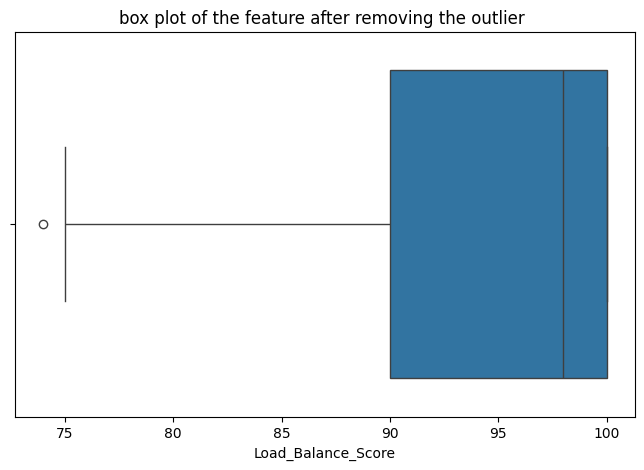

In [121]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=fitness_dataset_copy['Load_Balance_Score'])
plt.title("box plot of the feature after removing the outlier ")
plt.show()


In [129]:
#dropping unnecessary columns
fitness_dataset_copy.drop(columns=["Athlete_ID"], inplace=True)

In [111]:
#one hot encoding for gender column because it's a nominal categorical feature
fitness_dataset_copy = pd.get_dummies(fitness_dataset_copy, columns=["Gender"], drop_first=False)

In [112]:
fitness_dataset_copy.head()

,Athlete_ID,Age,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator,Gender_Female,Gender_Male
0,A001,24,195,99,Center,2,13,2,3,1,1,99,58,100,4,0,True,False
1,A002,21,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0,False,True
2,A003,22,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0,False,True
3,A004,24,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0,True,False
4,A005,20,173,79,Center,3,9,1,2,1,2,90,51,83,49,0,True,False


In [113]:
#fix the genders column to be 0 and 1 not true and false
fitness_dataset_copy["Gender_Male"] = fitness_dataset_copy["Gender_Male"].astype(int)
fitness_dataset_copy["Gender_Female"] = fitness_dataset_copy["Gender_Female"].astype(int)

In [114]:
fitness_dataset_copy.head()

,Athlete_ID,Age,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator,Gender_Female,Gender_Male
0,A001,24,195,99,Center,2,13,2,3,1,1,99,58,100,4,0,1,0
1,A002,21,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0,0,1
2,A003,22,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0,0,1
3,A004,24,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0,1,0
4,A005,20,173,79,Center,3,9,1,2,1,2,90,51,83,49,0,1,0


In [115]:
#now for position feature
fitness_dataset_copy = pd.get_dummies(fitness_dataset_copy, columns=["Position"], drop_first=False)

In [116]:
fitness_dataset_copy["Position_Center"] = fitness_dataset_copy["Position_Center"].astype(int)
fitness_dataset_copy["Position_Forward"] = fitness_dataset_copy["Position_Forward"].astype(int)
fitness_dataset_copy["Position_Guard"] = fitness_dataset_copy["Position_Guard"].astype(int)

In [130]:
fitness_dataset_copy.head()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,...,Gender_Male,Position_Center,Position_Forward,Position_Guard,ACL_Injury_Interaction,Height_m,BMI,Training_Load,Fatigue_Rest_Ratio,Match_Rest_Ratio
0,24,195,99,2,13,2,3,1,1,99,...,0,1,0,0,0,1.95,26.035503,26,0.5,3.000000
1,21,192,65,8,14,1,3,1,4,55,...,1,0,1,0,0,1.92,17.632378,112,4.0,3.000000
2,22,163,83,8,8,2,1,3,6,58,...,1,0,0,1,0,1.63,31.239414,64,3.0,0.333333
3,24,192,90,1,13,1,1,1,7,82,...,0,0,0,1,0,1.92,24.414062,13,7.0,1.000000
4,20,173,79,3,9,1,2,1,2,90,...,0,1,0,0,0,1.73,26.395803,27,2.0,2.000000


# Feature Engineering

In [118]:
#from the correlation metrix i see that these two features are strongly related which significantly influence recovery time
fitness_dataset_copy['ACL_Injury_Interaction'] = fitness_dataset_copy['ACL_Risk_Score'] * fitness_dataset_copy['Injury_Indicator']


In [119]:
# BMI = Weight (kg) / (Height (m)^2)
fitness_dataset_copy['Height_m'] = fitness_dataset_copy['Height_cm'] / 100
fitness_dataset_copy['BMI'] = fitness_dataset_copy['Weight_kg'] / (fitness_dataset_copy['Height_m'] ** 2)

In [122]:
# Training Load = Training Intensity * Training Hours Per Week
fitness_dataset_copy['Training_Load'] = fitness_dataset_copy['Training_Intensity'] * fitness_dataset_copy['Training_Hours_Per_Week']

In [123]:
# Fatigue-to-Rest Ratio = Fatigue Score / Recovery Days Per Week
fitness_dataset_copy['Fatigue_Rest_Ratio'] = fitness_dataset_copy['Fatigue_Score'] / fitness_dataset_copy['Recovery_Days_Per_Week']

In [124]:
# Weekly Match Load = Match Count Per Week / Rest Between Events Days
fitness_dataset_copy['Match_Rest_Ratio'] = fitness_dataset_copy['Match_Count_Per_Week'] / fitness_dataset_copy['Rest_Between_Events_Days']

In [131]:
fitness_dataset_copy.head()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,...,Gender_Male,Position_Center,Position_Forward,Position_Guard,ACL_Injury_Interaction,Height_m,BMI,Training_Load,Fatigue_Rest_Ratio,Match_Rest_Ratio
0,24,195,99,2,13,2,3,1,1,99,...,0,1,0,0,0,1.95,26.035503,26,0.5,3.000000
1,21,192,65,8,14,1,3,1,4,55,...,1,0,1,0,0,1.92,17.632378,112,4.0,3.000000
2,22,163,83,8,8,2,1,3,6,58,...,1,0,0,1,0,1.63,31.239414,64,3.0,0.333333
3,24,192,90,1,13,1,1,1,7,82,...,0,0,0,1,0,1.92,24.414062,13,7.0,1.000000
4,20,173,79,3,9,1,2,1,2,90,...,0,1,0,0,0,1.73,26.395803,27,2.0,2.000000


# Model training

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [132]:
## Training the model using random forest
X = fitness_dataset_copy.drop(columns=['Recovery_Days_Per_Week'])
y = fitness_dataset_copy['Recovery_Days_Per_Week']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 153, Test set size: 39


In [133]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [134]:
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 0.34025641025641024
Mean Squared Error (MSE): 0.18619230769230768
R-Squared (R²): 0.7493818584070797


#Trying to enhance the model

In [135]:
#trying to find the best parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [147]:
best_rf_model = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
best_rf_model.fit(X_train, y_train)
y_pred_optimized = best_rf_model.predict(X_test)
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
mse_opt = mean_squared_error(y_test, y_pred_optimized)
r2_opt = r2_score(y_test, y_pred_optimized)

print(f"Optimized Model - Mean Absolute Error (MAE): {mae_opt}")
print(f"Optimized Model - Mean Squared Error (MSE): {mse_opt}")
print(f"Optimized Model - R-Squared (R²): {r2_opt}")


Optimized Model - Mean Absolute Error (MAE): 0.34349626737784633
Optimized Model - Mean Squared Error (MSE): 0.1874463594350071
Optimized Model - R-Squared (R²): 0.7476938825658002


In [149]:
# Compare results
print("Before Tuning:")
print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")

print("\nAfter Tuning:")
print(f"MAE: {mae_opt}, MSE: {mse_opt}, R²: {r2_opt}")


Before Tuning:
MAE: 0.34025641025641024, MSE: 0.18619230769230768, R²: 0.7493818584070797

After Tuning:
MAE: 0.34349626737784633, MSE: 0.1874463594350071, R²: 0.7476938825658002


In [138]:
fitness_dataset_copy.shape

(192, 25)

In [ ]:
# I tried to improve the model performance more using XGBoost (removed it because it performed very bad) and
# also with hyperparameter tuning but it made the performance worse also
# I think the dataset is very small which may limit the model ability to learn properly

# Save the model

In [150]:
import joblib
joblib.dump(rf_model, 'RecoveryTime_model.pkl')
print("Model saved successfully!")


Model saved successfully!
